## Khoa Học Tự Nhiên
## Lab 8 - ML - Backpropagation
### Nguyễn Quốc Bảo - 18110053

**Lab-08: Backpropagation**

Trong bài thực hành này chúng ta sẽ thử cài đặt Backpropagation 

Ta muốn dựa vào 2 chiều của lá, phân biệt giữa loại lá 1 và loại lá 2. Cụ thể, với $x = (x_1,x_2, 1)$ là input, ta muốn đoán một phân phối
    $$ P_\theta(c|x),c = 0, 1 $$
với $\theta$ là các tham số
Ta mô hình $P_\theta$ là một neural network có 2 lớp ẩn, mỗi lớp 5 neurons, tức là\n",
    $$ P_\theta(c|x) = \text{softmax}(\max(0, \max(0, x \cdot W_1 + b_1) \cdot W_2 + b_2) \cdot W_3 + b_3 )$$

với $x$ là vector dòng $[[x_1, x_2]]$ kích thước $ 1\times 2$, $W_1, W_2, W_3$ là các ma trận có kích thước $2 \times 5, 5 \times 5, 5 \times 3$, và $b_1, b_2, b_3$ là các ma trận kích thước $1 \times 5, 1 \times 5, 1 \times 3$.

Khi đó $P(c|x)$ là một vector dòng độ dài 3, xem như $P(c|x)= (P_1(c|x), P_2(c|x), P_3(c|x)) = (P(c=0|x), P(c=1|x), P(c=2|x))$
Bộ các ma trận $\\theta = (W_1, W_2, W_3, b_1, b_2, b_3)$ chính là tham số cần tìm của model. Giờ cần tìm $\\theta$ sao cho 

$$ L = \frac{1}{N} \sum_{x,y} - y_0 \log P_\theta(0|x) -  y_1 \log P_\theta(1|x) - y_2 \log P_\theta(2|x) $$

đạt giá trị nhỏ nhất với $y = (y_0, y_1, y_2)$ là one-hot vector biểu thị loại lá tương ứng với $x$



# Bài Tập
1. Từ code demo hãy cài đặt thêm một module để chọn ra được bộ weights sao cho accuracy trên tập validation là tốt nhất.

## Import library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Preprocessing

In [2]:
def one_hot_vector(y):
    out = np.zeros((y.shape[0], max(y)+1))
    for i in range(y.shape[0]):
        out[i, y[i]] = 1
    return out

In [3]:
train = pd.read_csv("https://raw.githubusercontent.com/huynhthanh98/ML/master/lab-08/bt_train.csv")
valid = pd.read_csv("https://raw.githubusercontent.com/huynhthanh98/ML/master/lab-08/bt_valid.csv")

x1_train = train["x1"].values
x2_train = train["x2"].values
y_train = train["label"].values

x1_valid = valid['x1'].values
x2_valid = valid['x2'].values
y_valid = valid['label'].values

# normalize
x1_mean = np.mean(x1_train)
x1_std = np.std(x1_train)
x2_mean = np.mean(x2_train)
x2_std = np.std(x2_train)

x1_train = (x1_train - x1_mean)/ x1_std
x2_train = (x2_train - x2_mean)/ x2_std

x1_valid = (x1_valid - x1_mean)/ x1_std
x2_valid = (x2_valid - x2_mean)/ x2_std



X_train = np.concatenate([x1_train.reshape(-1,1), x2_train.reshape(-1,1)], axis=1)
y_train = one_hot_vector(y_train)

X_valid = np.concatenate([x1_valid.reshape(-1,1), x2_valid.reshape(-1,1)], axis=1)

In [4]:
print(X_train.shape, X_valid.shape)

(900, 3) (300, 3)


In [5]:
# initialize
W1 = np.random.randn(2,5)
W2 = np.random.randn(5,5)
W3 = np.random.randn(5,3)

b1 = np.random.randn(1,5)
b2 = np.random.randn(1,5)
b3 = np.random.randn(1,3)

In [6]:
def relu(h):
    return np.array([max(0,i) for i in h.reshape(-1)]).reshape(h.shape)

def softmax(z):
    return np.exp(z)/ np.sum(np.exp(z), axis=1).reshape(-1,1)

def sigmoid(Z):
    return 1 / (1 + np.exp(-Z))

def CrossEntropy(o,y):
    return - np.sum(y*np.log(o))

def predict(X_valid,y_valid , W1, b1, W2, b2, W3, b3):
    z1_valid = np.dot(X_valid, W1) + b1
    o1_valid = relu(z1_valid)

    z2_valid = np.dot(o1_valid, W2) + b2
    o2_valid = relu(z2_valid)

    z3_valid = np.dot(o2_valid, W3) + b3
    o3_valid = softmax(z3_valid)
    
    accuracy = np.sum(np.argmax(o3_valid, axis = 1) == y_valid)/ y_valid.shape[0]
    
    return accuracy

ln = 0.001
N = y_train.shape[0]

In [7]:
ls_loss = []
store = dict()
for epochs in range(10000):
    # foward
    z1 = np.dot(X_train, W1) + b1
    o1 = relu(z1)

    z2 = np.dot(o1, W2) + b2
    o2 = relu(z2)

    z3 = np.dot(o2, W3) + b3
    o3 = softmax(z3)
    
    Parameter = {'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2, 'W3': W3, 'b3': b3}
    accuracy = predict(X_valid, y_valid , W1, b1, W2, b2, W3, b3)
    store[accuracy] = Parameter
   
    # backpropagation
    dL_dz3 = 1/len(X_train)*(o3 - y_train) 
    dL_dW3 = np.dot(o2.T, dL_dz3)    
    dL_db3 = np.sum(dL_dz3, axis = 0)


    dL_do2 = np.dot(dL_dz3, W3.T)
    dL_dz2 = dL_do2.copy()
    dL_dz2[z2 < 0] = 0
    dL_dW2 = np.dot(o1.T,dL_dz2)
    dL_db2 = np.sum(dL_dz2, axis = 0)

    dL_do1 = np.dot(dL_dz2, W2.T)
    dL_dz1 = dL_do1.copy()
    dL_dz1[z1 < 0] = 0
    dL_dW1 = np.dot(X_train.T, dL_dz1)
    dL_db1 = np.sum(dL_dz1, axis = 0)

    W3 -= ln* dL_dW3
    b3 -= ln* dL_db3
    W2 -= ln* dL_dW2
    b2 -= ln* dL_db2
    W1 -= ln* dL_dW1
    b1 -= ln* dL_db1

In [8]:
store = list(sorted(store.items(), reverse=True , key = lambda t: t[0]))
accuracy, Parameter = store[0]
print('accuracy :', accuracy)
print('Parameter: ',Parameter)

accuracy : 0.6633333333333333
Parameter:  {'W1': array([[ 0.02694447, -0.7906416 ,  0.3302676 ,  2.35072935,  1.36882669],
       [ 0.58438011,  0.38741171,  0.50252065,  0.03250823,  1.26698177]]), 'b1': array([[-0.97044389,  0.08331571,  0.26254916,  0.78149445,  0.46839515]]), 'W2': array([[ 0.48025174, -0.61985499,  0.96069146, -1.96437687,  0.41398502],
       [-1.32433466, -0.91175675,  0.73369779, -1.79556679, -1.76457783],
       [-1.23224983, -0.93832586, -0.0466786 ,  0.48377297,  0.63710807],
       [-1.39352776,  0.28487368, -1.11022537,  0.69753778,  0.42563566],
       [ 1.24757854,  0.25826951, -2.12480102,  0.97396357, -2.28130296]]), 'b2': array([[ 0.3392448 ,  0.77882641,  0.60510154, -0.23496288, -1.1806147 ]]), 'W3': array([[ 0.40194578,  0.11485569, -0.58658745],
       [-1.81281847,  1.08732044, -0.23196456],
       [-0.59930622, -0.75246117, -1.08292404],
       [ 0.09991397, -0.4170902 ,  1.0432869 ],
       [-1.39083156, -1.64351731, -0.87444904]]), 'b3': array

 

2. Từ bộ dữ liệu bên dưới hãy cài đặt backpropagation cho bài toán phân biệt ung thư vú. Hãy tự chọn số layers và số nodes mà mình cho là thích hợp, cũng như là nêu ra số layers và số nodes của mỗi layer mà mình đã chọn. Tính accuracy trên tập training.

In [9]:
from sklearn import datasets

breast_cancer = datasets.load_breast_cancer()
X = breast_cancer.data  
y = breast_cancer.target

from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split( X, y, test_size=0.2, random_state=42)

X_mean=np.mean(X_train)
X_std=np.std(X_train)

X_valid=(X_valid-X_mean)/X_std
X_train=(X_train-X_mean)/X_std

In [10]:
print(X_train.shape, X_valid.shape)

(455, 30) (114, 30)


In [11]:
np.unique(y)

array([0, 1])

In [18]:
class NeuralNetwork:
    def __init__(self, layers_size):
        self.layers_size = layers_size
        self.parameters = {}
        self.L = len(self.layers_size)
        self.n = 0
        self.costs = []
    
    def initialize_parameters(self):
        np.random.seed(1)
        
        for l in range(1, len(self.layers_size)):
            self.parameters["W" + str(l)] = np.random.randn(self.layers_size[l], 
                                        self.layers_size[l - 1]) / np.sqrt(self.layers_size[l - 1])
            self.parameters["b" + str(l)] = np.zeros((self.layers_size[l], 1))
    def forward(self, X):
        store = {}
 
        O = X.T
        for l in range(self.L - 1):
            Z = self.parameters["W" + str(l + 1)].dot(O) + self.parameters["b" + str(l + 1)]
            O = self._sigmoid(Z)
            store["O" + str(l + 1)] = O
            store["W" + str(l + 1)] = self.parameters["W" + str(l + 1)]
            store["Z" + str(l + 1)] = Z
 
        Z = self.parameters["W" + str(self.L)].dot(O) + self.parameters["b" + str(self.L)]
        O = self._sigmoid(Z)
        store["O" + str(self.L)] = O
        store["W" + str(self.L)] = self.parameters["W" + str(self.L)]
        store["Z" + str(self.L)] = Z
 
        return O, store
    
    def _sigmoid(self, Z):
        return 1 / (1 + np.exp(-Z))
    
    def _sigmoid_derivative(self, Z):
        s = 1 / (1 + np.exp(-Z))
        return s * (1 - s)
 
    def backward(self, X, Y, store):
 
        derivatives = {}
 
        store["O0"] = X.T
 
        O = store["O" + str(self.L)]
        dO = -np.divide(Y, O) + np.divide(1 - Y, 1 - O)
 
        dZ = dO * self._sigmoid_derivative(store["Z" + str(self.L)])
        dW = dZ.dot(store["O" + str(self.L - 1)].T) / self.n
        db = np.sum(dZ, axis=1, keepdims=True) / self.n
        dAPrev = store["W" + str(self.L)].T.dot(dZ)
 
        derivatives["dW" + str(self.L)] = dW
        derivatives["db" + str(self.L)] = db
 
        for l in range(self.L - 1, 0, -1):
            dZ = dAPrev * self._sigmoid_derivative(store["Z" + str(l)])
            dW = 1. / self.n * dZ.dot(store["O" + str(l - 1)].T)
            db = 1. / self.n * np.sum(dZ, axis=1, keepdims=True)
            if l > 1:
                dAPrev = store["W" + str(l)].T.dot(dZ)
 
            derivatives["dW" + str(l)] = dW
            derivatives["db" + str(l)] = db
 
        return derivatives
 
    def fit(self, X, Y, learning_rate=0.01, n_iterations=2500):
        np.random.seed(1)
 
        self.n = X.shape[0]
 
        self.layers_size.insert(0, X.shape[1])
 
        self.initialize_parameters()
        for epoch in range(1,n_iterations+1):
            O, store = self.forward(X)
            cost = np.squeeze(-(Y.dot(np.log(O.T)) + (1 - Y).dot(np.log(1 - O.T))) / self.n)
            derivatives = self.backward(X, Y, store)

            for l in range(1, self.L + 1):
                self.parameters["W" + str(l)] = self.parameters["W" + str(l)] - learning_rate * derivatives["dW" + str(l)]
                self.parameters["b" + str(l)] = self.parameters["b" + str(l)] - learning_rate * derivatives["db" + str(l)]
 
            if epoch % 1000 == 0:
                print('>> epoch=%d/%d, cost=%.3f' % (epoch, n_iterations, cost))
                self.costs.append(cost)
 
    def predict(self, X, Y):
        O, cache = self.forward(X)
        n = X.shape[0]
        p = np.zeros((1, n))
 
        for i in range(0, O.shape[1]):
            if O[0, i] > 0.5:
                p[0, i] = 1
            else:
                p[0, i] = 0
 
        print("Accuracy: " + str(np.sum((p == Y) / n)))
 
    def plot_cost(self):
        plt.figure()
        plt.plot(np.arange(len(self.costs)), self.costs)
        plt.xlabel("epochs")
        plt.ylabel("cost")
        plt.show()

>> epoch=1000/10000, cost=0.461
>> epoch=2000/10000, cost=0.352
>> epoch=3000/10000, cost=0.299
>> epoch=4000/10000, cost=0.272
>> epoch=5000/10000, cost=0.255
>> epoch=6000/10000, cost=0.245
>> epoch=7000/10000, cost=0.237
>> epoch=8000/10000, cost=0.231
>> epoch=9000/10000, cost=0.226
>> epoch=10000/10000, cost=0.222

accuracy trên tập training
Accuracy: 0.9098901098901095
accuracy trên tập validation
Accuracy: 0.9473684210526316


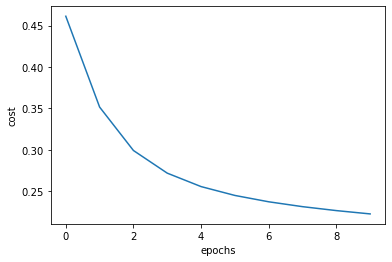

In [19]:
layer_size = [30, 1]
nn = NeuralNetwork(layer_size)
nn.fit(X_train, y_train, learning_rate=0.01, n_iterations=10000)
print()
print('accuracy trên tập training')
nn.predict(X_train,y_train)
print('accuracy trên tập validation')
nn.predict(X_valid,y_valid)
nn.plot_cost()